[((-9.681336353374148, 18.978743095907507), (-8.091122377896358, 18.802052654187754)), ((-9.681336353374148, 18.978743095907507), (-8.328256863144492, 16.667842286954542)), ((-9.918470838622282, 16.844532728674295), (-8.091122377896358, 18.802052654187754)), ((-9.918470838622282, 16.844532728674295), (-8.328256863144492, 16.667842286954542)), ((-9.918470838622282, 16.844532728674295), (-8.565391348392627, 14.533631919721328)), ((-10.155605323870418, 14.710322361441083), (-8.328256863144492, 16.667842286954542)), ((-10.155605323870418, 14.710322361441083), (-8.565391348392627, 14.533631919721328)), ((-10.155605323870418, 14.710322361441083), (-8.802525833640761, 12.399421552488114)), ((-10.155605323870418, 14.710322361441083), (-7.908877622103643, 13.197947345812247)), ((-10.155605323870418, 14.710322361441083), (-9.499091597581433, 13.374637787532002)), ((-10.392739809118552, 12.576111994207869), (-8.565391348392627, 14.533631919721328)), ((-10.392739809118552, 12.576111994207869), (-8

c:\Users\CYTech Student\workspace\PuboOnGraph.py:592: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(["SA 1000 iter 50"] )


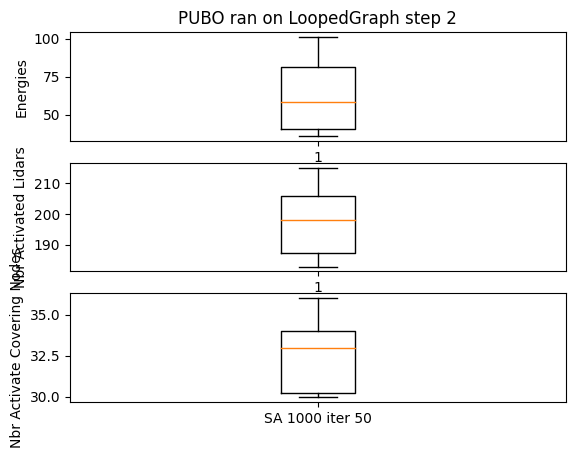

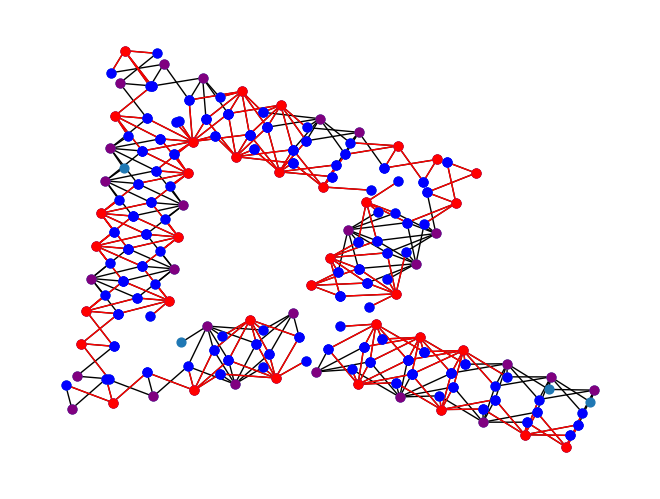

<Figure size 640x480 with 0 Axes>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from PuboOnGraph import Graph,listLidar,listCovering
#from PuboOnSqArea import Graph,listPositionLidar as listLidar,listCovering
G = nx.Graph()
import os
from platform import node
import numpy as np
import qiskit_optimization
from docplex.mp.model import Model
from qiskit_optimization.problems import QuadraticProgram
import networkx as nx
import re

points1 = [] #placement of lidars for one side
points2 = [] #placement of lidars for other side
points3 = [] #vertices to cover

pointsL = listLidar
points3 = listCovering
G = Graph

#G.add_nodes_from(points1 + points2 + points3)

def showGraph(S):
    
    pos = {node: node for node in G.nodes()} 
    nx.draw(G, pos, with_labels=False, node_size=40)
    actE = []
    actN = []
    for node in S:
      for edge in G.edges(node):
        actE.append(edge)
      for node2 in G.neighbors(node):
        actN.append(node2)
    # Draw the graph
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, with_labels=False,node_color = 'grey', node_size=40)
    nx.draw_networkx_nodes(G, pos, listLidar, node_color = 'purple', node_size= 40)
    nx.draw_networkx_nodes(G, pos, S, node_color='red', node_size=40)
    nx.draw_networkx_nodes(G, pos, actN, node_color='blue', node_size=40)
    nx.draw_networkx_nodes(G, pos, S, node_color='red', node_size=40)
    nx.draw_networkx_edges(G, pos, actE, edge_color='red', node_size=40)
    plt.show()

In [2]:
m = Model(name='BMW') 

x = m.binary_var_dict(pointsL, name='x')
m.objective_expr = sum(x[i] for i in pointsL)
m.objective_sense = 'min'

for node in points3:
    m.add_constraint(1 == sum(x[v] for v in G.neighbors(node)))

print(m.prettyprint())
m.export_as_lp(basename="BMW", path=os.path.abspath(""))

quadratic_program = QuadraticProgram()
quadratic_program.read_from_lp_file(os.path.join(os.path.abspath(""), 'BMW.lp'))
print(quadratic_program.prettyprint())

from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
import math
# qubo conversion
conv = QuadraticProgramToQubo()
qp = conv.convert(quadratic_program)

matrice = qp.objective.quadratic.coefficients.asformat("array")
diagonal = qp.objective.linear.coefficients.asformat("array")*1.3
# num = 0
# num1 = 0
for i in range (len(matrice)):
    # num1 = 0
    for j in range(len(matrice[i])):
        # num1 += 1
        if j == i:
            matrice[i][j] += diagonal[0][j]
    # num += 1
matrice2 = np.zeros((int(math.sqrt(len(matrice))+1)**2,int(math.sqrt(len(matrice))+1)**2))
matrice2[:len(matrice),:len(matrice)] = matrice
np.save("matrice_QUBO_Equal.npy",matrice2)


print(qp.objective.linear.to_array())
print(qp.objective.linear.coefficients)
print(qp.objective.quadratic.to_array())
print(qp.objective.quadratic.coefficients)


for n in qp.binary_var_dict(3).keys():
    print("n =", n)
for n in qp.integer_var_dict(3).items():
    print(n)
print(qp.prettyprint())

// This file has been generated by DOcplex
// model name is: BMW
// var contrainer section
dvar bool x[59];

minimize
 x_m9.681336353374148_18.978743095907507
 + x_m9.918470838622282_16.844532728674295
 + x_m10.155605323870418_14.710322361441083
 + x_m10.392739809118552_12.576111994207869
 + x_m10.629874294366687_10.441901626974657
 + x_m10.867008779614821_8.307691259741445
 + x_m11.104143264862957_6.1734808925082305
 + x_m11.341277750111091_4.039270525275018
 + x_m11.578412235359226_1.905060158041806
 + x_m11.815546720607362_m0.22915020919140616
 + x_m12.052681205855496_m2.3633605764246184
 + x_m6.318663646625852_13.021256904092493
 + x_m6.550583757004272_10.93397591068672
 + x_m6.782503867382691_8.846694917280946
 + x_m7.01442397776111_6.7594139238751705
 + x_m7.24634408813953_4.672132930469397
 + x_m7.47826419851795_2.5848519370636236
 + x_m7.7487801976466475_18.086794100956354
 + x_m5.816224041919148_17.1948451060052
 + x_m3.883667886191649_16.302896111054046
 + x_m1.95111173046414

Problem name: BMW

Minimize
  x_0.1365823022135224_10.04191262001278
  + x_0.46846321214597264_5.409062379291525
  + x_1.3783970819863105_7.2289301189722
  + x_1.8732339247321312_m2.903359492746654
  + x_1.9140005809908498_13.627049126200586
  + x_10.129223739771906_m6.205755418762564
  + x_11.415493384840664_m2.4121314310824644
  + x_12.193221193531848_m7.03135440026654
  + x_13.579137368774436_m3.277589024655973
  + x_2.2883309518266484_9.048797858652875
  + x_2.7609174491055755_1.049698943211571
  + x_3.7510677689191305_3.0299995828386814
  + x_3.84655673671835_12.735100131249432
  + x_3.9372313784920747_m3.728958474250631
  + x_4.741218088732686_5.010300222465792
  + x_4.924561433039347_0.18424134963806227
  + x_5.731368408546241_6.9906008620929025
  + x_5.77911289244585_11.843151136298278
  + x_6.001228832252018_m4.554557455754608
  + x_6.721518728359797_8.970901501720014
  + x_7.0882054169731195_m0.6812162439354466
  + x_7.711669048173352_10.951202141347125
  + x_8.06522628601196